### TITLE : Handling NaN values
<p> Author : BRYAN LIM YUQIANG </p> 
<p> Contact me : </p>
<li>Bryanlimyuqiang@gmail.com</li>
<li><a href = "https://www.linkedin.com/in/bryanlimyuqiang/">Linkedin </a></li> 

<p>In this section we will look at the following: </p>
<li> Handling NaN Values </li> 
<li> Basic Statistics </li> 
<li> Rolling Operations </li> 
<li> Visualisation Basics </li>

## 1. Handling NaN Values

There may be NaN values across different tickers. This may arise due to difference in timing of IPO or stoppages etc. The algo architect will need to decide on whether he or she wants to backfill, forwardfill, fill with 0 or dropna. Ideally, we will wish that the data can be consistent.

In [7]:
# import necessary lib
import pandas as pd
import pandas_datareader.data as pdr
import datetime 


#Download historical data for required stocks 
tickers = ['MSFT', 'AMZN', 'AAPL', 'CSCO', 'IBM', 'FB']

close_prices = pd.DataFrame() #dataframe to store close price of each ticker
attempt = 0 #initialising passthrough variable
drop = [] #initialising list to store tickers whose close price was successfully extracted
while len(tickers) != 0 and attempt <= 5:
    tickers = [j for j in tickers if j not in drop] #removing stocks whose data has been extracted
    for i in range(len(tickers)): 
        try:
            # 10 years of data
            temp = pdr.get_data_yahoo(tickers[i], datetime.date.today() - datetime.timedelta(3650), datetime.date.today())
            temp.dropna(inplace = True)
            close_prices[tickers[i]] = temp['Adj Close']
            drop.append(tickers[i])
        except:
            print(tickers[i], ': failed to fetch data.. retrying')
            continue
    attempt +=1 
    


In [8]:
close_prices

,MSFT,AMZN,AAPL,CSCO,IBM,FB
Date,,,,,,
2010-05-10,22.822834,131.289993,31.496237,20.037632,91.173630,NaN
2010-05-11,22.775520,130.460007,31.809975,19.907263,91.621315,NaN
2010-05-12,23.217154,133.869995,32.500687,20.505409,95.802017,NaN
2010-05-13,23.059423,131.470001,32.038147,19.577526,94.935547,NaN
2010-05-14,22.814947,128.529999,31.475155,19.125088,94.726151,NaN
...,...,...,...,...,...,...
2020-05-01,174.570007,2286.040039,289.070007,40.919998,120.257210,202.270004
2020-05-04,178.839996,2315.989990,293.160004,41.349998,120.069717,205.259995
2020-05-05,180.759995,2317.800049,297.559998,41.459999,120.957809,207.070007


### The easy way to manage NaN values is to drop and sweep it under the carpet

In [6]:
# Handling NaN Values
# close_prices.dropna(axis=0) 

,MSFT,AMZN,AAPL,CSCO,IBM,FB
Date,,,,,,
2012-05-18,24.394806,213.850006,65.770210,12.863833,146.358612,38.230000
2012-05-21,24.794863,218.110001,69.601997,13.020042,147.763336,34.029999
2012-05-22,24.803186,215.330002,69.067520,13.066903,147.060989,31.000000
2012-05-23,24.261457,217.279999,70.752777,13.035661,146.537994,32.000000
2012-05-24,24.228115,215.240005,70.102989,12.801349,146.515564,33.029999
...,...,...,...,...,...,...
2020-05-01,174.570007,2286.040039,289.070007,40.919998,120.257210,202.270004
2020-05-04,178.839996,2315.989990,293.160004,41.349998,120.069717,205.259995
2020-05-05,180.759995,2317.800049,297.559998,41.459999,120.957809,207.070007


### Do we just drop all the values or is there a better way to manage it?

In [10]:
close_prices.fillna(method = 'bfill', axis = 0, inplace =True) 

In [11]:
close_prices

,MSFT,AMZN,AAPL,CSCO,IBM,FB
Date,,,,,,
2010-05-10,22.822834,131.289993,31.496237,20.037632,91.173630,38.230000
2010-05-11,22.775520,130.460007,31.809975,19.907263,91.621315,38.230000
2010-05-12,23.217154,133.869995,32.500687,20.505409,95.802017,38.230000
2010-05-13,23.059423,131.470001,32.038147,19.577526,94.935547,38.230000
2010-05-14,22.814947,128.529999,31.475155,19.125088,94.726151,38.230000
...,...,...,...,...,...,...
2020-05-01,174.570007,2286.040039,289.070007,40.919998,120.257210,202.270004
2020-05-04,178.839996,2315.989990,293.160004,41.349998,120.069717,205.259995
2020-05-05,180.759995,2317.800049,297.559998,41.459999,120.957809,207.070007


## 2. Basic Statistics

In [12]:
# MEAN, MODE, S.D, Daily return

close_prices.mean()

MSFT     57.328282
AMZN    742.354859
AAPL    112.918866
CSCO     26.307004
IBM     132.044016
FB       97.951422
dtype: float64

In [13]:
close_prices.median()

MSFT     41.784264
AMZN    425.470001
AAPL     98.569885
CSCO     23.224869
IBM     133.592316
FB       81.830002
dtype: float64

In [14]:
close_prices.std()

MSFT     40.464551
AMZN    622.352572
AAPL     65.135819
CSCO     11.823510
IBM      15.225811
FB       60.180803
dtype: float64

### Might be better to look at stastistics after we normalise the data ..

In [15]:
daily_return = close_prices.pct_change() # same as (close_prices/close_prices.shift(1))-1

In [16]:
daily_return

,MSFT,AMZN,AAPL,CSCO,IBM,FB
Date,,,,,,
2010-05-10,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-11,-0.002073,-0.006322,0.009961,-0.006506,0.004910,0.000000
2010-05-12,0.019391,0.026138,0.021714,0.030047,0.045630,0.000000
2010-05-13,-0.006794,-0.017928,-0.014232,-0.045251,-0.009044,0.000000
2010-05-14,-0.010602,-0.022363,-0.017573,-0.023110,-0.002206,0.000000
...,...,...,...,...,...,...
2020-05-01,-0.025891,-0.075974,-0.016099,-0.034450,-0.029388,-0.011919
2020-05-04,0.024460,0.013101,0.014149,0.010508,-0.001559,0.014782
2020-05-05,0.010736,0.000782,0.015009,0.002660,0.007396,0.008818


In [17]:
daily_return.mean()

MSFT    0.000956
AMZN    0.001346
AAPL    0.001051
CSCO    0.000434
IBM     0.000210
FB      0.000897
dtype: float64

In [18]:
daily_return.median()

MSFT    0.000589
AMZN    0.001050
AAPL    0.000889
CSCO    0.000481
IBM     0.000449
FB      0.000000
dtype: float64

In [19]:
daily_return.std()

MSFT    0.015931
AMZN    0.019851
AAPL    0.017303
CSCO    0.017038
IBM     0.013886
FB      0.020993
dtype: float64

## 3. Rolling Operations and Statistics
We might be interested in finding out example 20/50 day moving average across a time period rather than the entirety of the time period on it own and this is especially important in technical analysis and quant finance.

In [23]:
daily_return.rolling(window=20).mean() 
#will make first 20 values NaN, this is also known as simple moving average
# daily_return.rolling(window=20, min_periods =1 ).mean() 
#^- this does not solve for NaN for the first 20 values 

,MSFT,AMZN,AAPL,CSCO,IBM,FB
Date,,,,,,
2010-05-10,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-11,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-12,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-13,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-14,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-05-01,0.006265,0.009298,0.008697,0.001738,0.005566,0.012853
2020-05-04,0.007948,0.010272,0.010123,0.003193,0.007152,0.014860
2020-05-05,0.004766,0.007925,0.006512,0.000293,0.003534,0.011613


However, some people prefer exponential moving average when analysing time series data than simple moving average as it give additional weightage to recent prices over past.

In [28]:
daily_return.ewm(span=20,min_periods = 20).mean()

,MSFT,AMZN,AAPL,CSCO,IBM,FB
Date,,,,,,
2010-05-10,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-11,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-12,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-13,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-14,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-05-01,0.003253,0.001873,0.004917,-0.000965,0.001536,0.011512
2020-05-04,0.005272,0.002943,0.005796,0.000128,0.001241,0.011823
2020-05-05,0.005793,0.002737,0.006674,0.000369,0.001827,0.011537


In [29]:
daily_return.ewm(span=20,min_periods = 20).std()

,MSFT,AMZN,AAPL,CSCO,IBM,FB
Date,,,,,,
2010-05-10,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-11,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-12,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-13,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-14,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-05-01,0.033219,0.036831,0.030401,0.031776,0.031682,0.036855
2020-05-04,0.032237,0.035196,0.029050,0.030421,0.030150,0.035070
2020-05-05,0.030707,0.033484,0.027771,0.028947,0.028739,0.033370


## 4. Daily Visualisation using Pandas

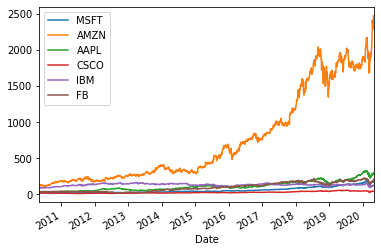

In [32]:
close_prices.plot()

In [33]:
cp_standardised = (close_prices - close_prices.mean())/ close_prices.std()

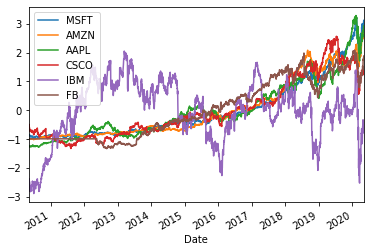

In [34]:
cp_standardised.plot()

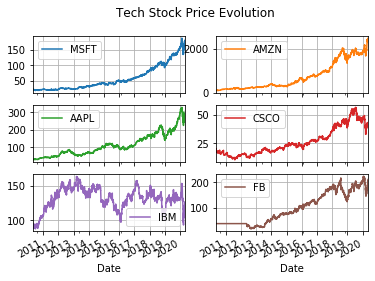

In [36]:
close_prices.plot(subplots = True, layout=(3,2), title = 'Tech Stock Price Evolution', grid = True);

## 4.1 Data Visualisation using Matplotlib

In [41]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

<BarContainer object of 6 artists>

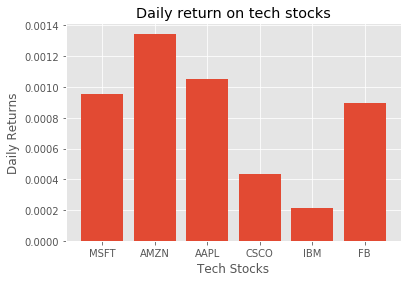

In [43]:
fig, ax = plt.subplots()
ax.set(title='Daily return on tech stocks', xlabel= 'Tech Stocks', ylabel = 'Daily Returns')
plt.bar(daily_return.columns, daily_return.mean())